Using a neural network to predict stock prices, using only basic data

In [1]:
%matplotlib inline

from sklearn import neural_network
from matplotlib import pyplot as plt
import datetime
import pandas_datareader.data as web
import pandas as pd
import numpy as np

In [2]:
# import data from yahoo finance
start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime(2016,6,20) 
symbol = "PETR4.SA"
df = web.DataReader(symbol, 'yahoo', start_date, end_date)

In [3]:
import sklearn
sklearn.__version__
# version is outdated. 0.18.1, which has regression neural network, 
# is still in development stage

'0.18.dev0'

In [4]:
# create a new neural network
reg = neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', 
                                          algorithm='adam', alpha=0.0001, batch_size='auto', 
                                          learning_rate='constant', learning_rate_init=0.001, 
                                          power_t=0.5, max_iter=200, shuffle=True, 
                                          random_state=None, tol=0.0001, verbose=False, 
                                          warm_start=False, momentum=0.9, 
                                          nesterovs_momentum=True, early_stopping=False, 
                                          validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                                          epsilon=1e-08)

In [5]:
# transform df data into X and y
## separate X and y
X = df[df.columns - ['Adj Close']]
y = df['Adj Close']

## normalize X
X = (X - X.min()) / (X.max() - X.min())

# separate training and testing data
def split(array, n):
    return array[:n], array[n:]

def train_test_data(X,y, test_percent=.3):
    length = int(X.shape[0] * (1-test_percent))
    X_train, X_test = split(X,length)
    y_train, y_test = split(y,length)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_data(X,y)

/Users/lucasosouza/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [7]:
# feed into nn algorithm
reg.fit(X_train, y_train)

# predict test data
y_pred = reg.predict(X_test)

# combine y_train and y_pred, and y_train and y_test, and plot them both
y_pred_full = list(y_train) + list(y_pred)

# turn into a df and index
y_pred_full= pd.DataFrame(y_pred_full, index=y)

In [8]:
# series_predicted.reindex(y.index)
y_pred_full = list(y_train) + list(y_pred)
y_pred_full = pd.DataFrame(y_pred_full, index=y.index)

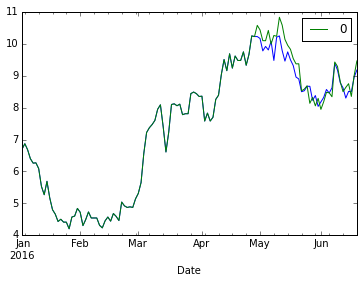

In [10]:
# plot
# 
ax = y.plot()
y_pred_full.plot(ax = ax)
# plt.show()

# note: I got used to using ggplot2 for plot, but I need to be able to do the same with 
# matplotlib. That would increase my skills further using pandas, which are natively
# integrated with matplotlib package. 

In [21]:
# okay I can use today's data to predict today price.
# the question is, can I use today data to predict tomorrow price? how close?
# set up new y with a shift

X = X[:-1]
y = y[1:].reindex(X.index)

# now each line corresponds to the price one day after
# re run the procedures
# how if they are not functions... dumb ass

X_train, y_train, X_test, y_test = train_test_data(X,y)


print y.head()
print y.tail()


Date
2016-01-01     NaN
2016-01-04     NaN
2016-01-05    6.70
2016-01-06    6.87
2016-01-07    6.68
Name: Adj Close, dtype: float64
Date
2016-06-14    8.78
2016-06-15    8.62
2016-06-16    8.30
2016-06-17    8.51
2016-06-20    8.50
Name: Adj Close, dtype: float64
